/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.3402 - loss: 1.8333 - val_accuracy: 0.4806 - val_loss: 1.6240
Epoch 2/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3952 - loss: 1.7190 - val_accuracy: 0.4806 - val_loss: 1.6781
Epoch 3/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3798 - loss: 1.7446 - val_accuracy: 0.4806 - val_loss: 1.6200
Epoch 4/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4066 - loss: 1.7069 - val_accuracy: 0.4806 - val_loss: 1.6025
Epoch 5/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4057 - loss: 1.7059 - val_accuracy: 0.4806 - val_loss: 1.6212
Epoch 6/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4069 - loss: 1.7045 - val_accuracy: 0.4806 - val_loss: 1.6072
Epoch 7/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4072 - loss: 1.7095 - val_accuracy: 0.4806 - val_loss: 1.6021
Epoch 8/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3954 - loss: 1.7339 - val_accuracy: 0.4806 - val_lo

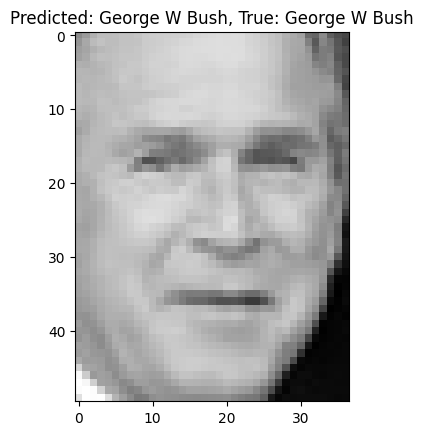

In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Step 1: Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Get the images and the labels
images = lfw_people.images
labels = lfw_people.target
target_names = lfw_people.target_names

# Step 2: Preprocess the data
# Reshape images to (num_samples, height, width, channels)
X = np.expand_dims(images, axis=-1)  # (samples, 50, 37, 1)
X = X / 255.0  # Normalize images to the range [0, 1]

# Convert labels to one-hot encoding
y = to_categorical(labels, num_classes=len(target_names))

# Step 3: Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 4: Define the CNN architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 37, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(target_names), activation='softmax'))

# Step 5: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_val, y_val))

# Step 7: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Step 8: Predict the class of a random test image
random_idx = random.randint(0, len(X_test) - 1)
random_img = X_test[random_idx]
random_label = y_test[random_idx]

# Predict the class
prediction = model.predict(np.expand_dims(random_img, axis=0))
predicted_class = np.argmax(prediction)

# Get the class name
predicted_class_name = target_names[predicted_class]
true_class_name = target_names[np.argmax(random_label)]

# Display the image and the prediction
plt.imshow(random_img.squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted_class_name}, True: {true_class_name}")
plt.show()

# End the program
